In [61]:
%matplotlib inline
from pylab import *

In [62]:
def HdT1(S1,F,A,B,T1,epsilon): # function that gives the value of H*dT_1/dt
    return S1-F-(A+B*T1)+epsilon

def HdT2(S2,alpha,a,F,A,B,T2,epsilon): # function that gives the value of H*dT_2/dt
    return S2*(1-2*alpha*a)+F-(A+B*T2)+epsilon

def C(T1):               # function that gives value of C(T_1)
    top = T1 - 273.15    # top of fraction in exponential
    bottom = T1 - 35.86  # bottom of fraction in exponential
    fract = top / bottom # fraction in exponential
    return 6.11 * exp(17.23 * fract)

def newF(F0,gamma1,gamma2,T1,T2): # function that gives value of atmospheric heat transport parameter
    return F0 + gamma1 * (T1 - T2) + gamma2 * C(T1) * (T1 - T2)

def newa(T1,T2,Tice): # function that gives value of fractional area of hemisphere covered in ice
    phiicedeg = 30 + 30 * (T1 - Tice) / (T1 - T2) # phi_ice in degrees
    phiicerad = phiicedeg * pi / 180.0            # phi_ice in radians
    return 1 - sin(phiicerad)

In [63]:
dt = 1.0                 # time step
maxtime = 500            # length of simulation
t = arange(0,maxtime,dt) # time array
Tice = 271.15            # temperature of ice
H = 10                   # heat capacity of upper ocean layer
F0 = 3.0                 # F_0 value to be used to find value of atmospheric heat transport parameter
A = -49.7                # Budyko-Sellers constant
B = 0.29                 # Budyko-Sellers constant
alpha = 0.29             # effective ice albedo
epsilon = 0.0            # forcing parameter
S1 = 40.9                # net incoming solar flux for T_1 box
S2 = 24.1                # net incoming solar flux for T_2 box
gamma1 = 0.035           # constant used to find value of atmospheric heat transport parameter
gamma2 = 0.002852        # constant used to find value of atmospheric heat transport parameter
T10 = 280.0              # initial temperature of T_1 box in kelvin
T20 = 260.0              # initial temperature of T_2 box in kelvin

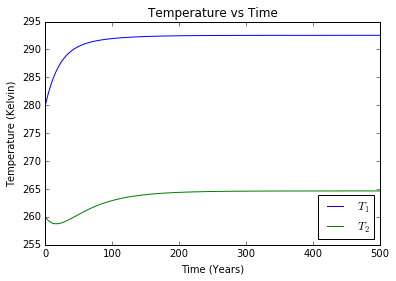

In [64]:
T1 = zeros(maxtime)   # temperature array for T_1 box
T2 = zeros(maxtime)   # temperature array for T_2 box
a = zeros(maxtime)    # fractional area of hemisphere covered in ice array
F = zeros(maxtime)    # atmospheric heat transport array
T1[0] = T10           # sets initial temperature for T_1 box
T2[0] = T20           # sets initial temperature for T_2 box
for i in range(0,len(t)-1):                   # creates loop that cycles through all of the arrays
    F[i] = newF(F0,gamma1,gamma2,T1[i],T2[i]) # sets new F value
    a[i] = newa(T1[i],T2[i],Tice)             # sets new a value
    T1[i+1] = T1[i] + (HdT1(S1,F[i],A,B,T1[i],epsilon)) / H * dt             # updates temperature for T_1 box
    T2[i+1] = T2[i] + (HdT2(S2,alpha,a[i],F[i],A,B,T2[i],epsilon)) / H * dt  # updates temperature for T_2 box
plot(t,T1,label="$T_1$")        # plots temperature vs time graph for T_1 box
plot(t,T2,label="$T_2$")        # plots temperature vs time graph for T_2 box
legend(loc="best")
ylabel("Temperature (Kelvin)")
xlabel("Time (Years)")
title("Temperature vs Time")
show()

In [65]:
afix = a[-2]             # a value at equilibrium
dT1phi = T1[-1] - T1[0]  # ΔT_1,α for a fixed a value
dT2phi = T2[-1] - T2[0]  # ΔT_2,α for a fixed a value

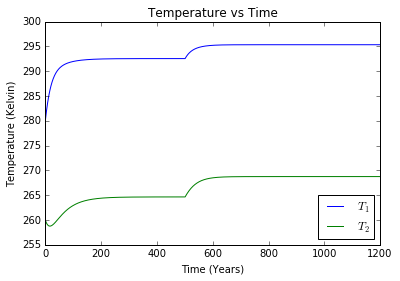

In [58]:
epsilon = 0.0
maxtime = 1200
t = arange(0,maxtime,dt)
T1 = zeros(maxtime)
T2 = zeros(maxtime)
F = zeros(maxtime)
T1[0] = T10
T2[0] = T20
for i in range(0,len(t)-1):
    F[i] = newF(F0,gamma1,gamma2,T1[i],T2[i])
    if i <= 500:
        a = newa(T1[i],T2[i],Tice)
    else:
        epsilon = 1.0
        a = afix
    T1[i+1] = T1[i] + (HdT1(S1,F[i],A,B,T1[i],epsilon)) / H * dt
    T2[i+1] = T2[i] + (HdT2(S2,alpha,a,F[i],A,B,T2[i],epsilon)) / H * dt
plot(t,T1,label="$T_1$")
plot(t,T2,label="$T_2$")
legend(loc="best")
ylabel("Temperature (Kelvin)")
xlabel("Time (Years)")
title("Temperature vs Time")
show()

In [59]:
dT10phi = T1[-1] - T1[0]
dT20phi = T2[-1] - T2[0]
GT1phi = dT1phi / dT10phi
GT2phi = dT2phi / dT20phi
lambdaT1 = dT10phi / epsilon
lambdaT2 = dT20phi / epsilon
fT1 = -1.0 / GT1phi + 1.0
fT2 = -1.0 / GT2phi + 1.0
cT1 = fT1 / lambdaT1
cT2 = fT2 / lambdaT2
print(dT1phi,dT2phi)
print(dT10phi,dT20phi)
print(GT1phi,GT2phi)
print(lambdaT1,lambdaT2)
print(fT1,fT2)
print(cT1,cT2)

12.5427891315 4.65309109337
15.3382590974 8.75488786902
0.817745289855 0.531484944523
15.3382590974 8.75488786902
-0.222874668195 -0.881520841382
-0.0145306365461 -0.100688992774


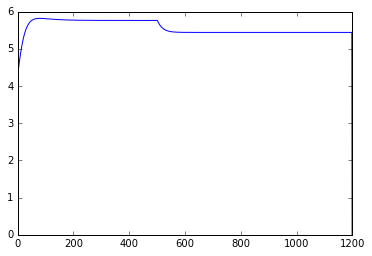

In [43]:
plot(t,F)